In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import xarray
import time
import matplotlib.patches as patches
import glob

#from __future__ import print_function
import matplotlib.colors as mcolors

from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES
from scipy import stats

CPU times: user 62 µs, sys: 993 µs, total: 1.05 ms
Wall time: 1.06 ms


## How to find the time evolution of cloud fraction. 
### step 1: link all the hourly cloud fraction data together
### step 2: use the pdf function to find the mean within/outside the clearing region. 

In [20]:
%%time
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
### LU_INDEX
file = path+'Xingu_2005_bigclearing/3Dfields_d01_2005-11-10_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
    luindex=ds1['LU_INDEX'][0,:,:]
    lats=ds1['XLAT'][0,:,0]
    lons=ds1['XLONG'][0,0,:]

with xarray.open_dataset(path+'Xingu_2005_bigclearing/wrfout_d01_2005-11-01_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds2:
    znu=ds2['ZNU'][0,:]

CPU times: user 52.5 ms, sys: 5.87 ms, total: 58.4 ms
Wall time: 58.3 ms


In [19]:
znu

<xarray.DataArray 'ZNU' (bottom_top: 34)>
array([0.996907, 0.989883, 0.980982, 0.969786, 0.955825, 0.938608, 0.917657,
       0.892567, 0.863075, 0.829143, 0.791013, 0.749237, 0.70464 , 0.658129,
       0.610267, 0.56134 , 0.51169 , 0.461709, 0.411838, 0.362558, 0.314379,
       0.267826, 0.225014, 0.187685, 0.155376, 0.12741 , 0.103205, 0.082253,
       0.064119, 0.048422, 0.034836, 0.023076, 0.012898, 0.004088],
      dtype=float32)
Coordinates:
    XTIME    float32 ...
Dimensions without coordinates: bottom_top
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  eta values on half (mass) levels
    units:        
    stagger:

CPU times: user 21.6 ms, sys: 2.96 ms, total: 24.5 ms
Wall time: 23.9 ms


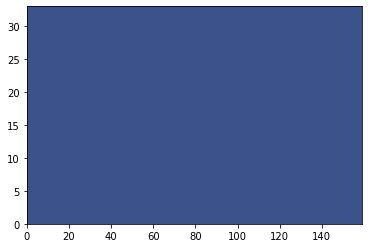

In [28]:
%%time
with xarray.open_dataset(path+'/post_processing/dif.CLDFRA.2015.bigclearing.nc',
                         decode_times=False,
                         mask_and_scale='True') as ds:
    pass


CPU times: user 14.9 s, sys: 194 ms, total: 15.1 s
Wall time: 15.2 s


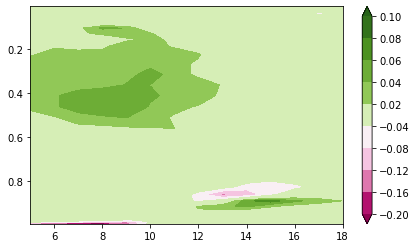

In [32]:
%%time
mean = np.empty((14,34))
for tt,time in enumerate(range(4+3,18+3)): ### 5am to 6pm
    data_sel = ds['CLDFRA'][24+time::24,:,:,:]  ### drop data of the first day. 
    cldfrac = data_sel.where(luindex==12)
    mean[tt,:]=cldfrac.mean(('Time','south_north','west_east')) ### Take the mean of all the data

fig,ax=plt.subplots(figsize=(7,4))
levels = [-0.2,-0.16,-0.12,-0.08,-0.04,0.02,0.04,0.06,0.08,0.10]
cmap_rb = plt.get_cmap('PiYG')
colors = cmap_rb(np.linspace(0, 1, len(levels) - 1))
cmap, norm = mcolors.from_levels_and_colors(levels, colors)
im=ax.contourf(range(5,19),znu[:],np.transpose(mean),cmap='PiYG',levels=levels,
             extend='both')
fig.colorbar(im,ax=ax)
ax.invert_yaxis()

CPU times: user 4min 46s, sys: 3.65 s, total: 4min 50s
Wall time: 4min 51s


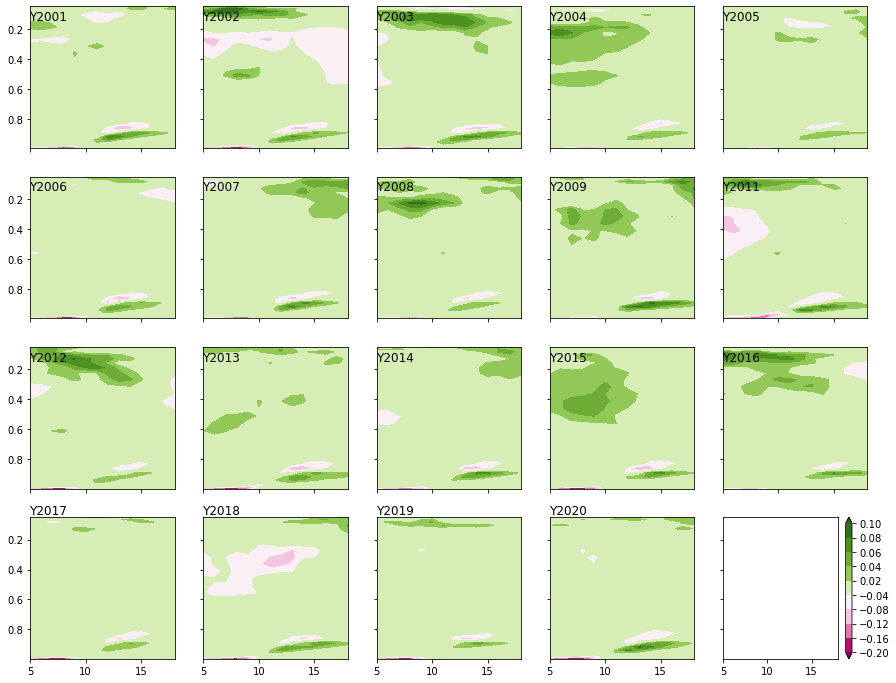

In [24]:
%%time
fig,axes = plt.subplots(4,5,figsize=(15,12),sharex=True,sharey=True)
axes = axes.ravel()  
levels = [-0.2,-0.16,-0.12,-0.08,-0.04,0.02,0.04,0.06,0.08,0.10]

year1=np.arange(2001,2010)
#years=year1
years=np.append(year1,np.arange(2011,2021))

for ii, year in enumerate(years):
    file = path+'post_processing/dif.CLDFRA.'+str(year)+'.bigclearing.nc'
    with xarray.open_dataset(file,decode_times=False,
                     mask_and_scale='True') as ds:
        pass

    mean = np.empty((14,34))
    for tt,time in enumerate(range(4+3,18+3)): ### 5am to 6pm
        data_sel = ds['CLDFRA'][24+time::24,:,:,:]  ### drop data of the first day. 
        cldfrac = data_sel.where(luindex==12)
        mean[tt,:]=cldfrac.mean(('Time','south_north','west_east')) ### Take the mean of all the data
    

    im = axes[ii].contourf(range(5,19),znu[:30],np.transpose(mean[:,:30]),cmap='PiYG',levels=levels,
             extend='both')
    
    axes[ii].invert_yaxis()
    axes[ii].set_title('Y'+str(years[ii]),loc='left',pad=-14)

fig.colorbar(im,ax=axes[19])